In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge

from IPython.display import Image
from IPython.core.display import HTML 


In [ ]:
url = 'https://raw.githubusercontent.com/Purrpo/purrpodata/main/spotifyclassifications.csv'
df = pd.read_csv(url)
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [ ]:
def wrangle(df):
  df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
  df.drop(columns = ['song_title','artist','target'], inplace = True)
  return df


df = wrangle(df)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904


In [ ]:
target = 'danceability'
X = df.drop(columns=target)
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
baseline = [y_train.mean()] * len(y_train)
baseline_mae = mean_absolute_error(y_train, baseline)

print('Mean Danceability:', y_train.mean())
print('Baseline MAE:', baseline_mae)

Mean Danceability: 0.6188592684438942
Baseline MAE: 0.1308874738687408


In [ ]:
model_lr = make_pipeline(
    SimpleImputer(),
    LinearRegression()
)
model_lr.fit(X_train, y_train);

In [ ]:
model_r = make_pipeline(
    SimpleImputer(),
    Ridge()
)
model_r.fit(X_train, y_train);

In [ ]:
print('Linear Training MAE:', mean_absolute_error(y_train, model_lr.predict(X_train)))
print('Linear Test MAE:',mean_absolute_error(y_test, model_lr.predict(X_test)))
print('Ridge Training MAE:', mean_absolute_error(y_train, model_r.predict(X_train)))
print('Ridge Test MAE:',mean_absolute_error(y_test, model_r.predict(X_test)))
print('Baseline MAE:', baseline_mae)

Linear Training MAE: 0.10736309801016154
Linear Test MAE: 0.10287545796765678
Ridge Training MAE: 0.10744064374247195
Ridge Test MAE: 0.10289014323251587
Baseline MAE: 0.1308874738687408


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


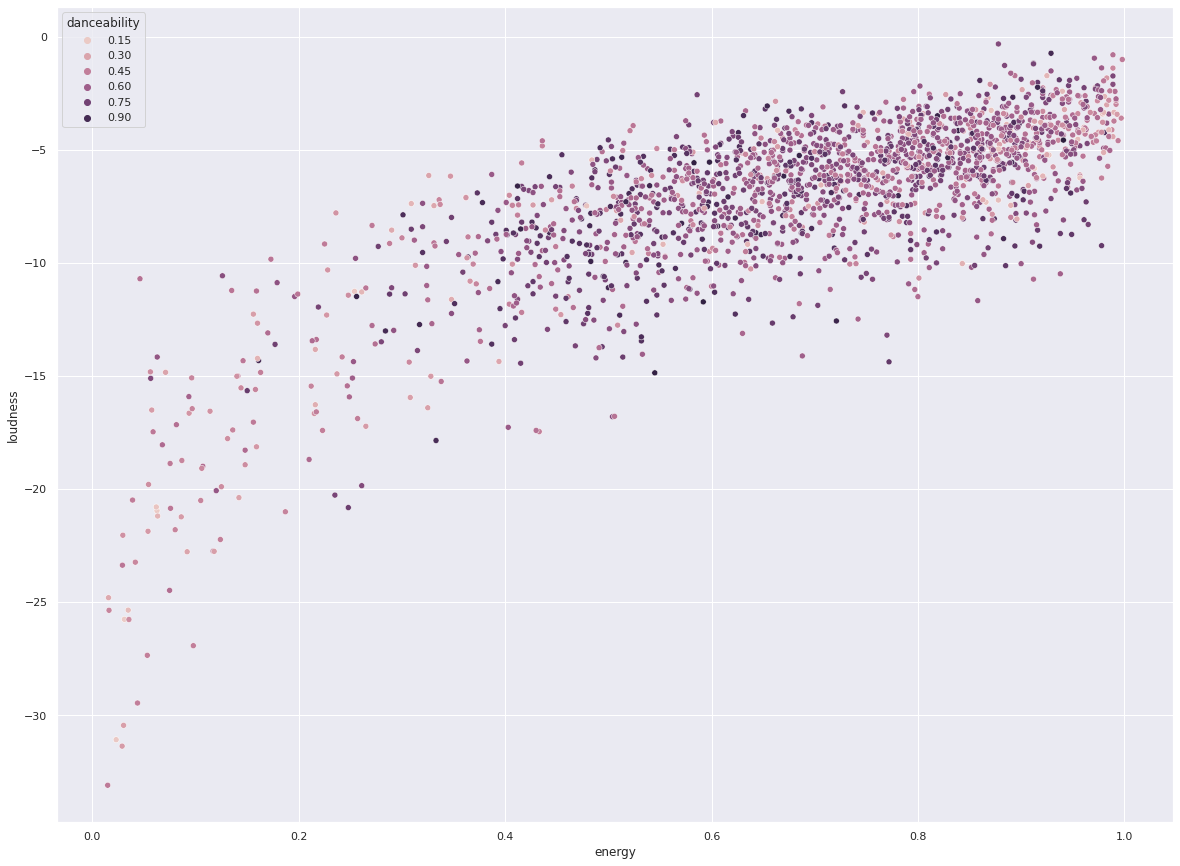

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,15)})
sns.scatterplot('energy', 'loudness', hue='danceability', data=df);

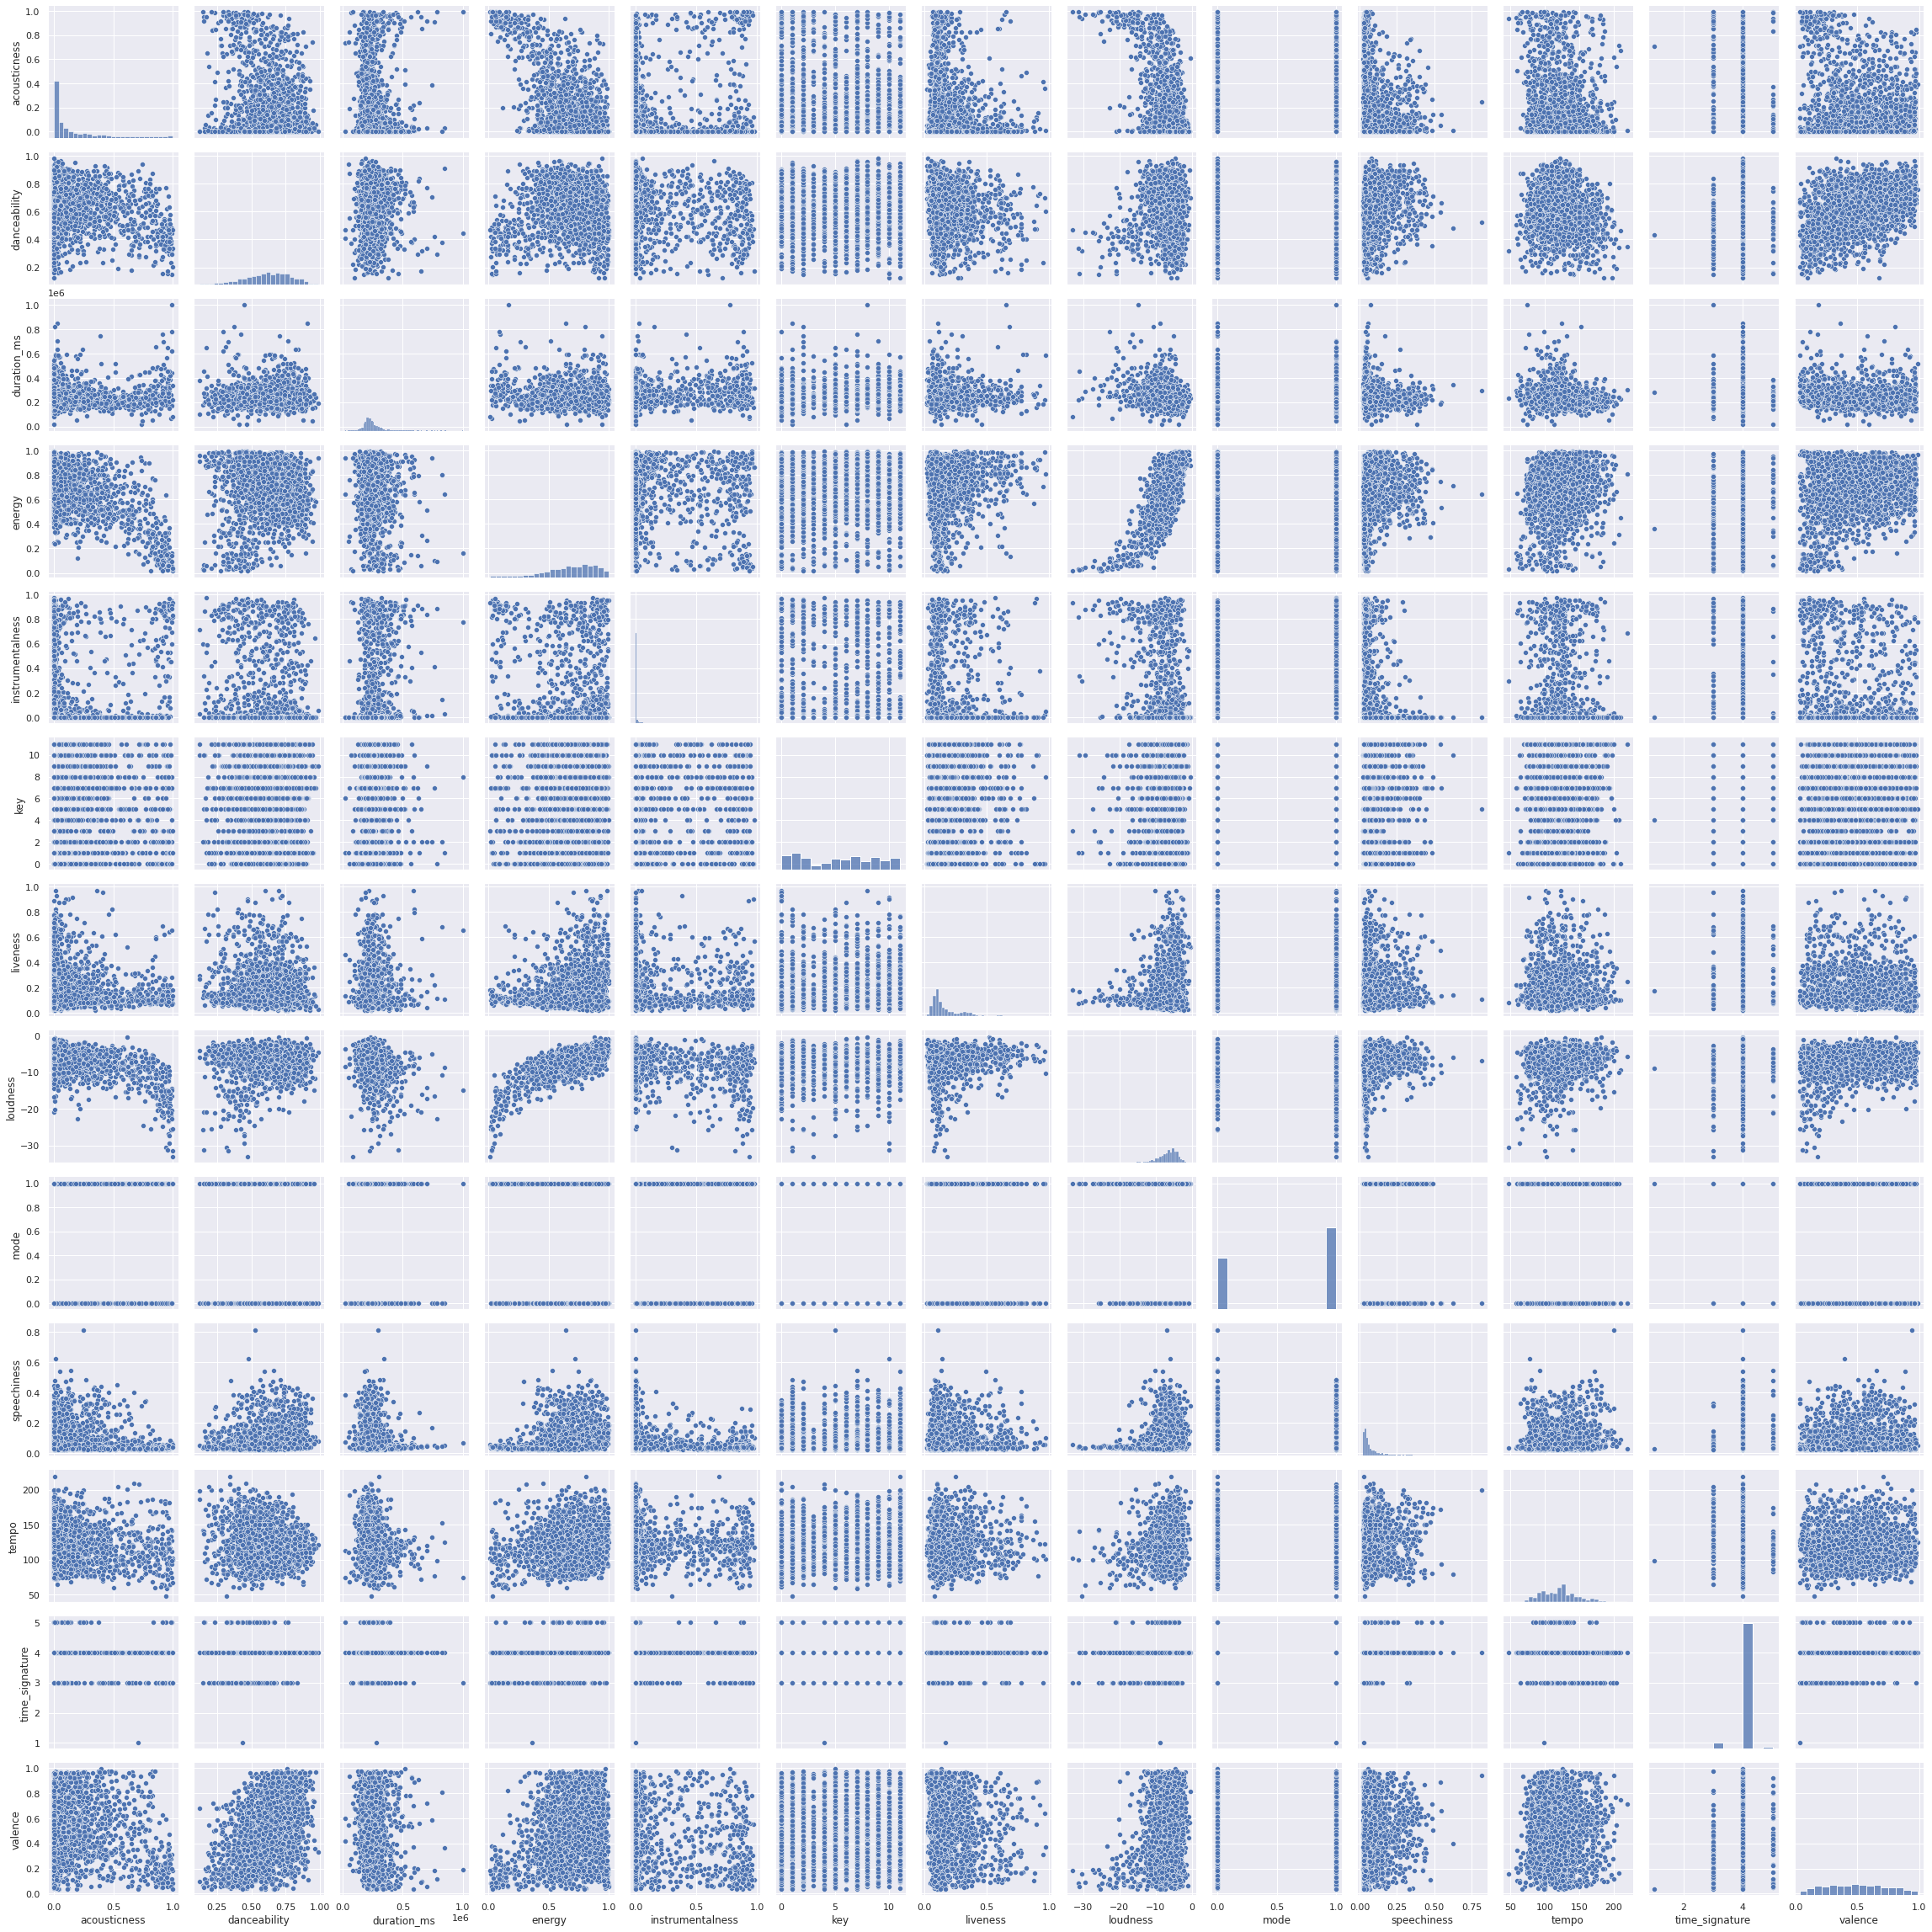

In [ ]:
sns.pairplot(df)